<a href="https://colab.research.google.com/github/NguyenLeVu-19146428/Project-AI_Nhan-Dien-10-Con-Vat-Bang-Am-Thanh/blob/main/Nhan_Dien_Dong_Vat_Qua_Am_Thanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [ ]:
with open('../content/drive/MyDrive/FINAL_PROJECT_AI/dataset.pickle', 'rb') as f:
    (x_train, y_train)  = pickle.load(f)
    (x_test, y_test)    = pickle.load(f)
x_pre_1 = x_test[2]     # Bird
x_pre_2 = x_test[127]    # Cat
x_pre_3 = x_test[259]    # Cow
x_pre_4 = x_test[326]    # Cricket
x_pre_5 = x_test[521]    # Dog
x_pre_6 = x_test[545]   # Gecko
x_pre_7 = x_test[692]   # Goat
x_pre_8 = x_test[808]   # Horse
x_pre_9 = x_test[922]   # Lion
x_pre_10 = x_test[1049]  # Squirrel

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test, 10)

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
#Tạo mảng Layer
model = Sequential() 
# Thêm dữ liệu vào mảng với đầu vào là ảnh 250x250 
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (250,250,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))

model.add(Dropout(0.2)) #Thiết lập để tạo lớp ẩn
model.add(MaxPooling2D(2,2)) #Giam kich thuoc cua anh dau ra khi qua lop an
#Tạo lớp ẩn thứ 2 với 64 tế bào trong lớp ẩn
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))

model.add(Dropout(0.2)) 
model.add(MaxPooling2D(2,2))
#Tạo lớp ẩn thứ 3 với 128 tế bào
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten()) #Đầu vào là mảng đa chiều qua lệnh Flatten trả về bản sao và đặc tính là mảng một chiều
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Lớp fully connected 
model.add(Dropout(0.25))
# Output Layer
model.add(Dense(10, activation='softmax'))
# In đặc tính model vừa tạo được
model.summary()
print ('Create Model Finish!')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
24/24 [==============================] - 31s 648ms/step - loss: 6.2266 - acc: 0.1745 - val_loss: 1.9930 - val_acc: 0.3681
Epoch 2/100
24/24 [==============================] - 9s 387ms/step - loss: 1.3669 - acc: 0.5405 - val_loss: 0.8792 - val_acc: 0.7859
Epoch 3/100
24/24 [==============================] - 9s 386ms/step - loss: 0.6856 - acc: 0.7889 - val_loss: 0.4259 - val_acc: 0.9060
Epoch 4/100
24/24 [==============================] - 9s 390ms/step - loss: 0.3064 - acc: 0.9033 - val_loss: 0.2225 - val_acc: 0.9373
Epoch 5/100
24/24 [==============================] - 9s 395ms/step - loss: 0.2066 - acc: 0.9425 - val_loss: 0.1418 - val_acc: 0.9634
Epoch 6/100
24/24 [==============================] - 9s 397ms/step - loss: 0.1051 - acc: 0.9660 - val_loss: 0.0755 - val_acc: 0.9843
Epoch 7/100
24/24 [==============================] - 10s 402ms/step - loss: 0.0715 - acc: 0.9771 - val_loss: 0.0485 - val_acc: 0.9843
Epoch 8/100
24/24 [==============================] - 10s 407ms/step

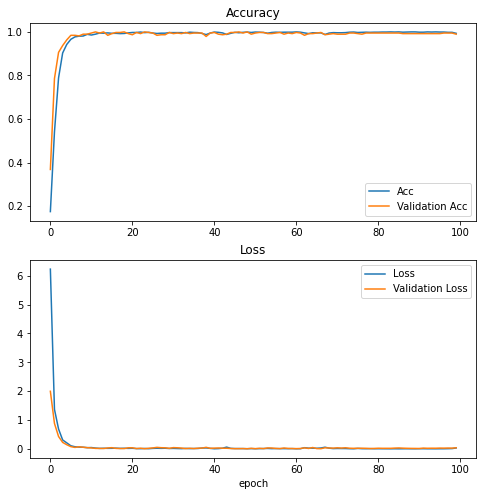

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
#Hàm dùng để train model với số lần học là 100, số lần ảnh đầu vào sẽ được train là 64 ảnh, validation_split = 0.2 là 0.8 train và 0.2 là tự đánh giá
his = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.2)

#Hiển thị độ chính xác quá trình train
score = model.evaluate(x_test, y_test, verbose=0)
print('Do Chinh Xac Kiem Tra: ',score[1])

#Vẽ biểu đồ
plot_history(his)
#Lưu lại khi đã học
model.save('../content/drive/MyDrive/FINAL_PROJECT_AI/CNN_final.h5')

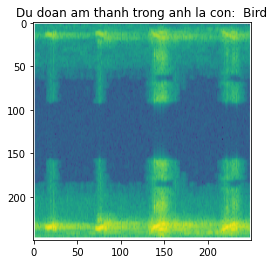

In [ ]:
label = ['Bird', 'Cat', 'Cow', 'Cricket', 'Dog', 'Gecko', 'Goat', 'Horse', 'Lion', 'Squirrel']
plt.title("Du doan am thanh trong anh la con:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

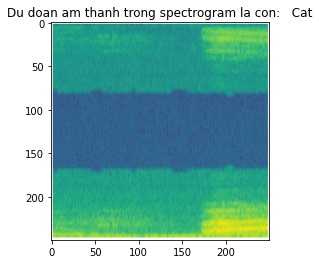

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:   " + label[np.argmax(model.predict(x_pre_2.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

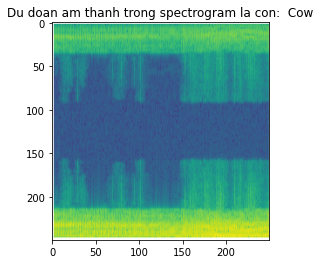

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

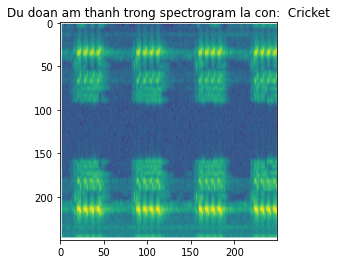

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

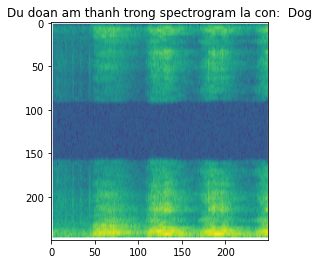

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_5.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_5, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

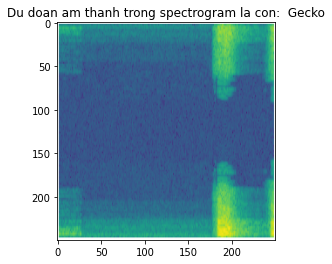

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_6.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_6, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

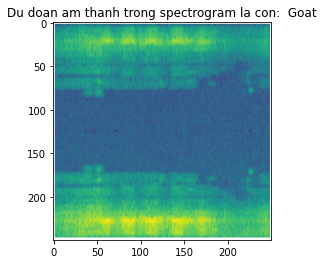

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_7.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_7, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

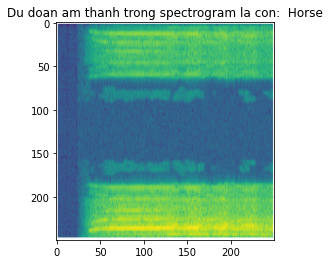

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_8.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_8, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

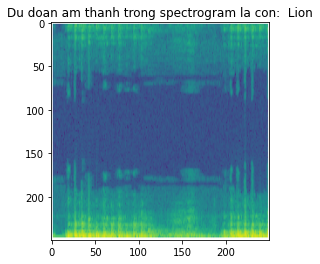

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_9.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_9, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

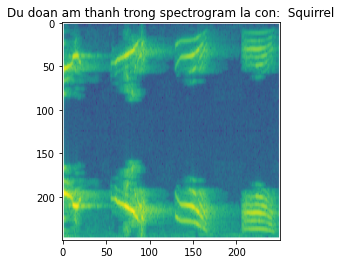

In [ ]:
plt.title("Du doan am thanh trong spectrogram la con:  " + label[np.argmax(model.predict(x_pre_10.reshape(1,250,250,3)))])
plt.imshow(cv2.cvtColor(x_pre_10, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [ ]:
import tensorflow 
import numpy as np
img = tf.keras.utils.load_img("../content/drive/MyDrive/FINAL_PROJECT_AI/data/Data_test/cow/cow0012.png", target_size = (250,250))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /=255
pred = np.argmax(model.predict(img),axis =0)
label = ['Bird', 'Cat', 'Cow', 'Cricket', 'Dog', 'Gecko', 'Goat', 'Horse', 'Lion', 'Squirrel']
label[pred[1]]